# Tratamento do datasets

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go

sns.set_style('darkgrid')

%matplotlib inline

In [2]:
db_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
db_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
db_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [3]:
db_deaths_country = db_deaths.groupby(['Country/Region']).sum()
db_confirmed_country = db_confirmed.groupby(['Country/Region']).sum()
db_recovered_country = db_recovered.groupby(['Country/Region']).sum()

In [4]:
db_deaths_country.drop(['Lat','Long'],axis=1,inplace=True)
db_confirmed_country.drop(['Lat','Long'],axis=1,inplace=True)
db_recovered_country.drop(['Lat','Long'],axis=1,inplace=True)

# Gráficos

In [5]:
date, n = db_deaths_country.iloc[:,db_deaths_country.shape[1]-1].name, 6

0## Confirmados

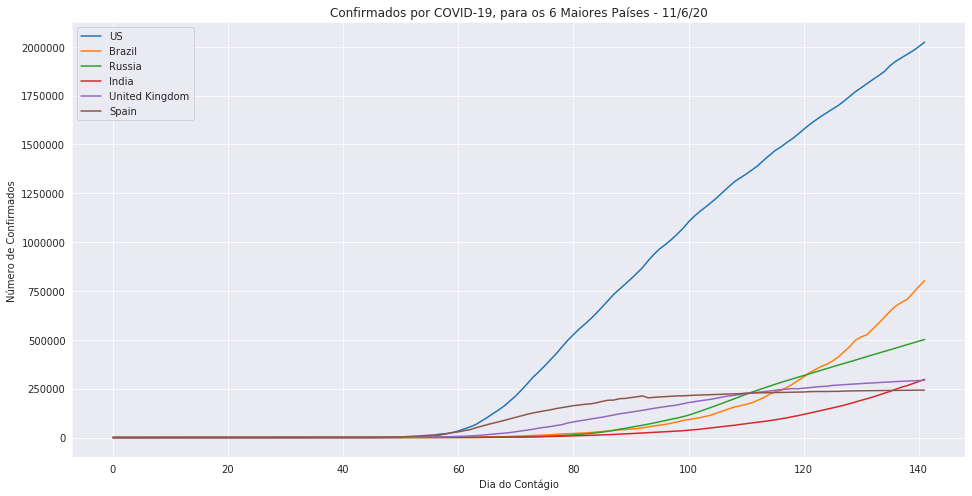

In [6]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
n = 6
for i in db_confirmed_country[date].sort_values(ascending = False)[:n].index:
  ax.plot(range(db_confirmed_country.T.shape[0]), db_confirmed_country.T[i],label=i)
plt.xlabel('Dia do Contágio')
plt.ylabel('Número de Confirmados')
plt.title('Confirmados por COVID-19, para os {} Maiores Países - {}'.format(n,date.split('/')[1]+'/'+date.split('/')[0]+'/'+date.split('/')[2]))
plt.legend()
plt.savefig('confirmedcovid.png')

## Mortes

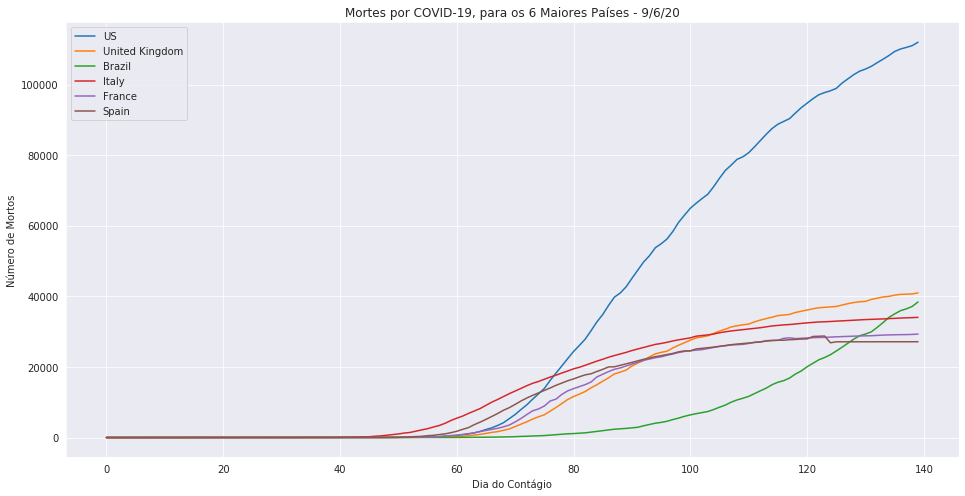

In [11]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
n = 6
for i in db_deaths_country[date].sort_values(ascending = False)[:n].index:
  ax.plot(range(db_deaths_country.T.shape[0]), db_deaths_country.T[i],label=i)
  
plt.xlabel('Dia do Contágio')
plt.ylabel('Número de Mortos')
plt.title('Mortes por COVID-19, para os {} Maiores Países - {}'.format(n,date.split('/')[1]+'/'+date.split('/')[0]+'/'+date.split('/')[2]))
plt.legend()
plt.savefig('deathscovid.png')

## Recuperados

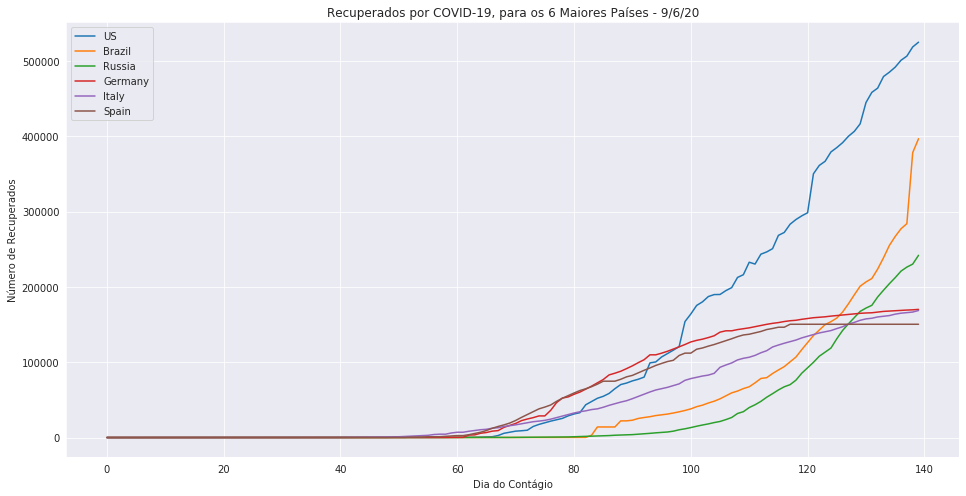

In [13]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
for i in db_recovered_country[date].sort_values(ascending = False)[:n].index:
  ax.plot(range(db_recovered_country.T.shape[0]), db_recovered_country.T[i],label=i)
plt.xlabel('Dia do Contágio')
plt.ylabel('Número de Recuperados')
plt.title('Recuperados por COVID-19, para os {} Maiores Países - {}'.format(n,date.split('/')[1]+'/'+date.split('/')[0]+'/'+date.split('/')[2]))
plt.legend()
plt.savefig('revoredcovid.png')